In [1]:
# from modules.chatbot import *
from modules.dataholder import *
from modules.preprocess import *
from modules.model import *
from modules.evaluate import *
import pandas as pd

In [2]:
# csv = './classification_test.csv'
# regression_flag = 0
# target = 'churn'

csv = './regression_test.csv'
regression_flag = 1
target = 'price'

dataholder = DataHolder()
dataholder.set_csv_path(csv)
prep = DataFramePreprocessor(dataholder)

Loading data at ./regression_test.csv
Normalizing column names
Converting column types
The current version cannot support date or time columns. These will be dropped automatically.


In [3]:
dataholder.get_dataframe().info()

<class 'pandas.core.frame.DataFrame'>
Index: 30154 entries, 0 to 30154
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          30154 non-null  float64
 1   bedrooms       30154 non-null  int64  
 2   bathrooms      30154 non-null  float64
 3   sqft_living    30154 non-null  int64  
 4   sqft_lot       30154 non-null  int64  
 5   floors         30154 non-null  float64
 6   waterfront     30154 non-null  int64  
 7   greenbelt      30154 non-null  int64  
 8   nuisance       30154 non-null  object 
 9   view           30154 non-null  object 
 10  condition      30154 non-null  object 
 11  grade          30154 non-null  object 
 12  heat_source    30122 non-null  object 
 13  sewer_system   30140 non-null  object 
 14  sqft_above     30154 non-null  int64  
 15  sqft_basement  30154 non-null  int64  
 16  sqft_garage    30154 non-null  int64  
 17  sqft_patio     30154 non-null  int64  
 18  yr_built   

In [4]:
dataholder.set_machine_learning_task(regression_flag)
prep.split_features(target)

In [5]:
dataholder.X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30154 entries, 0 to 30154
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       30154 non-null  int64  
 1   bathrooms      30154 non-null  float64
 2   sqft_living    30154 non-null  int64  
 3   sqft_lot       30154 non-null  int64  
 4   floors         30154 non-null  float64
 5   waterfront     30154 non-null  int64  
 6   greenbelt      30154 non-null  int64  
 7   nuisance       30154 non-null  object 
 8   view           30154 non-null  object 
 9   condition      30154 non-null  object 
 10  grade          30154 non-null  object 
 11  heat_source    30122 non-null  object 
 12  sewer_system   30140 non-null  object 
 13  sqft_above     30154 non-null  int64  
 14  sqft_basement  30154 non-null  int64  
 15  sqft_garage    30154 non-null  int64  
 16  sqft_patio     30154 non-null  int64  
 17  yr_built       30154 non-null  int64  
 18  yr_renovate

In [6]:
dataholder.y

0         675000.0
1         920000.0
2         311000.0
3         775000.0
4         592500.0
           ...    
30150    1555000.0
30151    1313000.0
30152     800000.0
30153     775000.0
30154     500000.0
Name: price, Length: 30154, dtype: float64

In [7]:
prep.train_test_split()

In [8]:
prep.clean_data(strictness = 2)

In [9]:
prep.standardize_and_encode()

In [10]:
X_train, X_test, y_train, y_test = dataholder.get_train_test()

In [11]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built
9993,4,3.5,4290,55742,2.0,1,0,YES,EXCELLENT,Good,11 Excellent,Gas,PUBLIC,2970,1480,750,1315,1978
24178,5,3.5,3530,5279,2.0,0,0,NO,NONE,Average,8 Good,Gas,PUBLIC,2550,980,420,280,2022
25576,3,1.0,1040,7287,1.0,0,0,NO,NONE,Very Good,7 Average,Electricity,PUBLIC,1040,0,300,0,1959
11295,3,2.0,1750,19465,1.0,0,0,NO,NONE,Good,7 Average,Gas,PRIVATE,1750,0,510,170,1974
10284,3,2.0,2810,84955,1.0,0,0,NO,NONE,Good,8 Good,Electricity,PRIVATE,1890,1140,800,590,1989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2276,3,2.0,1530,7178,2.0,0,0,YES,NONE,Good,7 Average,Gas,PUBLIC,1530,0,460,170,1978
29416,3,1.0,1170,5200,1.0,0,0,NO,NONE,Very Good,6 Low Average,Gas,PUBLIC,1170,0,0,56,1919
231,3,2.0,1490,8987,1.0,0,0,NO,NONE,Average,7 Average,Gas,PUBLIC,1170,580,440,0,1969
10806,5,3.5,3380,8400,3.0,0,0,YES,NONE,Average,10 Very Good,Gas,PUBLIC,3380,0,490,660,2017


In [12]:
y_train

9993     2400000.0
24178     986000.0
25576     742115.0
11295     505000.0
10284     725000.0
           ...    
2276     1050000.0
29416     485000.0
231      1200000.0
10806    3000000.0
9441     1800000.0
Name: price, Length: 23631, dtype: float64

In [13]:
encoders = dataholder.get_data_encoders()
encoders

{'preprocessor': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe', OneHotEncoder(drop='first'),
                                  ['waterfront', 'greenbelt', 'heat_source',
                                   'condition', 'view', 'nuisance', 'grade',
                                   'sewer_system']),
                                 ('ssc', StandardScaler(),
                                  ['bedrooms', 'bathrooms', 'sqft_living',
                                   'sqft_lot', 'floors', 'sqft_above',
                                   'sqft_basement', 'sqft_garage', 'sqft_patio',
                                   'yr_built'])])}

In [21]:
dataholder.set_modeling_parameters(
    hyperparameter_tuning = True,
    extended_models = True,
    cv = 5,
    random_state = 42
)

modeler = AutomaticModeler(dataholder = dataholder)

In [22]:
modeler.fit_and_score_model()

/home/josh/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.341e+12, tolerance: 1.480e+12
  model = cd_fast.enet_coordinate_descent(
/home/josh/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.681e+12, tolerance: 1.442e+12
  model = cd_fast.enet_coordinate_descent(


In [23]:
best_model = dataholder.get_best_model()
predictions = dataholder.get_predictions()
scores = dataholder.get_scores()

In [24]:
evaluator = ModelEvaluator(dataholder = dataholder)

**Rating: 8.5 / 10**

Overall, the regression model performed well, but there is room for improvement. The model's purpose is to predict the price of a house based on various features.

**Hypothesis Testing (f-stat: 790.87, f-p-value: 0.00)**

The model's F-statistic is 790.87, and the F-p-value is extremely low (1.11e-16). This indicates that the model's coefficients are significantly different from zero, and the model is a good fit for the data.

**Model Fit (train R^2: 0.51, train RSME: 613464.07, test R^2: 0.53, test RSME: 537755.61)**

The model's R^2 score is 0.51 for the training data and 0.53 for the testing data. This indicates that the model explains about 51% of the variance in the training data and 53% of the variance in the testing data. The RMSE values are 613464.07 for the training data and 537755.61 for the testing data. The model is not overfitting, as the train R^2 is lower than the test R^2, and the train RSME is higher than the test RSME. The model is not underfitting, as the R^2 scores are above 0.5. R^2 measures the proportion of the variance in the target variable that is explained by the model, and RMSE measures the average difference between the predicted and actual values.

**Top 5 Most Significant Features**

1. **grade_12 Luxury (p-value: 0.00, coefficient: 1.79e+06):** This feature is the most significant, indicating that a luxury grade increases the price of a house by approximately 1.79 million.
2. **waterfront_1 (p-value: 0.00, coefficient: 8.55e+05):** Having a waterfront property increases the price by approximately 855,000.
3. **view_EXCELLENT (p-value: 0.00, coefficient: 6.34e+05):** A view of EXCELLENT quality increases the price by approximately 634,000.
4. **sewer_system_PUBLIC (p-value: 0.00, coefficient: 2.03e+05):** Having a PUBLIC sewer system increases the price by approximately 203,000.
5. **sqft_above (p-value: 0.00, coefficient: 1.63e+05):** An increase in sqft_above increases the price by approximately 163,000.

**Explanation of the Top 5 Most Significant Features**

These features are the most significant because they have the lowest p-values and the highest coefficients. The grade of the house, having a waterfront property, having an excellent view, having a public sewer system, and the square footage above ground level are all important factors that increase the price of a house.

**Suggestions for Model Improvement**

1. Consider adding more features to the model, such as the age of the house, the number of bedrooms and bathrooms, and the type of heating and cooling system.
2. Check for multicollinearity among the features and remove any highly correlated features.
3. Consider using a different regression algorithm, such as Ridge or Lasso regression, to reduce overfitting.
4. Split the data into training and testing sets again and re-run the model to ensure that the results are consistent.
5. Consider using a more robust measure of model performance, such as mean absolute error (MAE) or mean absolute percentage error (MAPE), in addition to R^2 and RMSE.

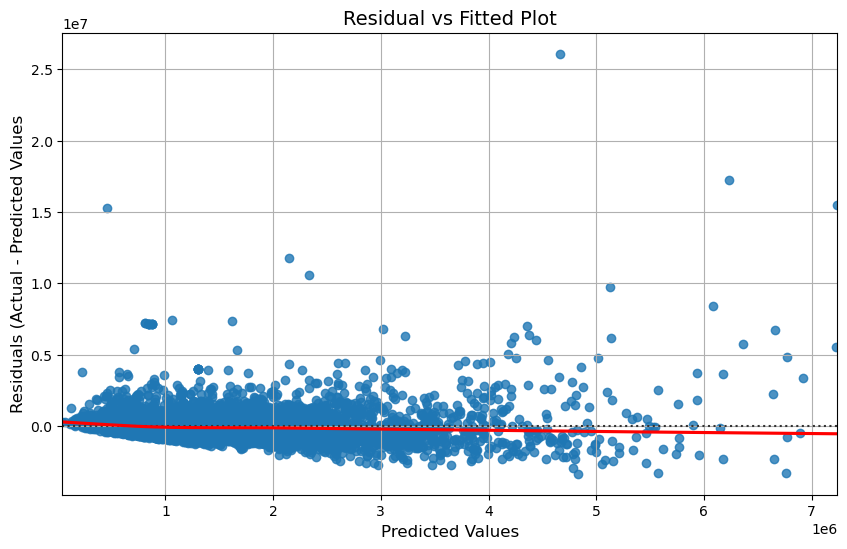

The residual plot shows the difference between the actual values and the predicted values of a model. In this case, the model is trying to predict the price of something.

The actual values are the "true" prices, and the predicted values are the prices that the model thinks they should be. The residual is the difference between these two values.

For example, if the actual price is $100 and the predicted price is $90, the residual would be $10, which means that the model underestimated the price by $10.

In this residual plot, the residuals are listed in order from smallest to largest. The first residual is -2, the second is -300,000, and so on.

I would rate the contents of this residual plot as an 8 out of 10. The plot shows a wide range of residuals, from very small to very large, which suggests that the model is not doing a great job of predicting the prices. Some of the residuals are very large, which could indicate that the model is making big mistakes. However, without more context, it's hard to say exactly what's going on.

In [25]:
evaluator.evaluate_regression_model()

In [19]:
# df = pd.read_csv('./test.csv')
# df.columns

In [20]:
# df.PaymentMethod.value_counts()